In [45]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [46]:
df = pd.read_csv(r"C:\Users\singh\Documents\Data Science Projects\Practice\ML Projects\ML Project 1\notebook\StudentsPerformance.csv")

In [47]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [49]:
df.shape

(1000, 8)

In [50]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

# <p style="padding:10px;background-color:#87CEEB ;margin:10;color:#000000;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 10px 10px ;overflow:hidden;font-weight:50">No missing value in the dataset</p>

In [51]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

# <p style="padding:10px;background-color:#87CEEB ;margin:10;color:#000000;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 10px 10px ;overflow:hidden;font-weight:50">No null value in the dataset</p>

In [52]:
df.duplicated().sum()

0

# <p style="padding:10px;background-color:#87CEEB ;margin:10;color:#000000;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 10px 10px ;overflow:hidden;font-weight:50">No duplicate value is in the dataset</p>

In [53]:
## checking the unique values in categorical columns
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [54]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [55]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [56]:
print("Categories in 'gender' column:", end=" ")
print(df['gender'].unique())

print("Categories in 'race/ethnicity' column:", end=" ")
print(df['race/ethnicity'].unique())

print("Categories in 'parental level of education' column:", end=" ")
print(df['parental level of education'].unique())

print("Categories in 'lunch' column:", end=" ")
print(df['lunch'].unique())

print("Categories in 'test preparation course' column:", end=" ")
print(df['test preparation course'].unique())


Categories in 'gender' column: ['female' 'male']
Categories in 'race/ethnicity' column: ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental level of education' column: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' column: ['standard' 'free/reduced']
Categories in 'test preparation course' column: ['none' 'completed']


In [57]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categotirical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

print("Numeric features:", numeric_features)
print("Categorical features:", categotirical_features)

Numeric features: ['math score', 'reading score', 'writing score']
Categorical features: ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


# <p style="padding:10px;background-color:#87CEEB ;margin:10;color:#000000;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 10px 10px ;overflow:hidden;font-weight:50">Adding column for Total Marks and Average Marks</p>

In [58]:
df['Total Marks'] = df['math score'] + df['reading score'] + df['writing score']
df['Average Marks'] = df['Total Marks'] / 3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total Marks,Average Marks
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


# <p style="padding:10px;background-color:#87CEEB ;margin:10;color:#000000;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 10px 10px ;overflow:hidden;font-weight:50">How many students have full marks</p>

In [59]:
reading_scores = df[df['reading score'] == 100]['Average Marks'].count()
math_scores = df[df['math score'] == 100]['Average Marks'].count()
writing_scores = df[df['writing score'] == 100]['Average Marks'].count()
print("Number of students with perfect reading score:", reading_scores)
print("Number of students with perfect math score:", math_scores)
print("Number of students with perfect writing score:", writing_scores)

Number of students with perfect reading score: 17
Number of students with perfect math score: 7
Number of students with perfect writing score: 14


# <p style="padding:10px;background-color:#87CEEB ;margin:10;color:#000000;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 10px 10px ;overflow:hidden;font-weight:50">Visual Analysis</p>

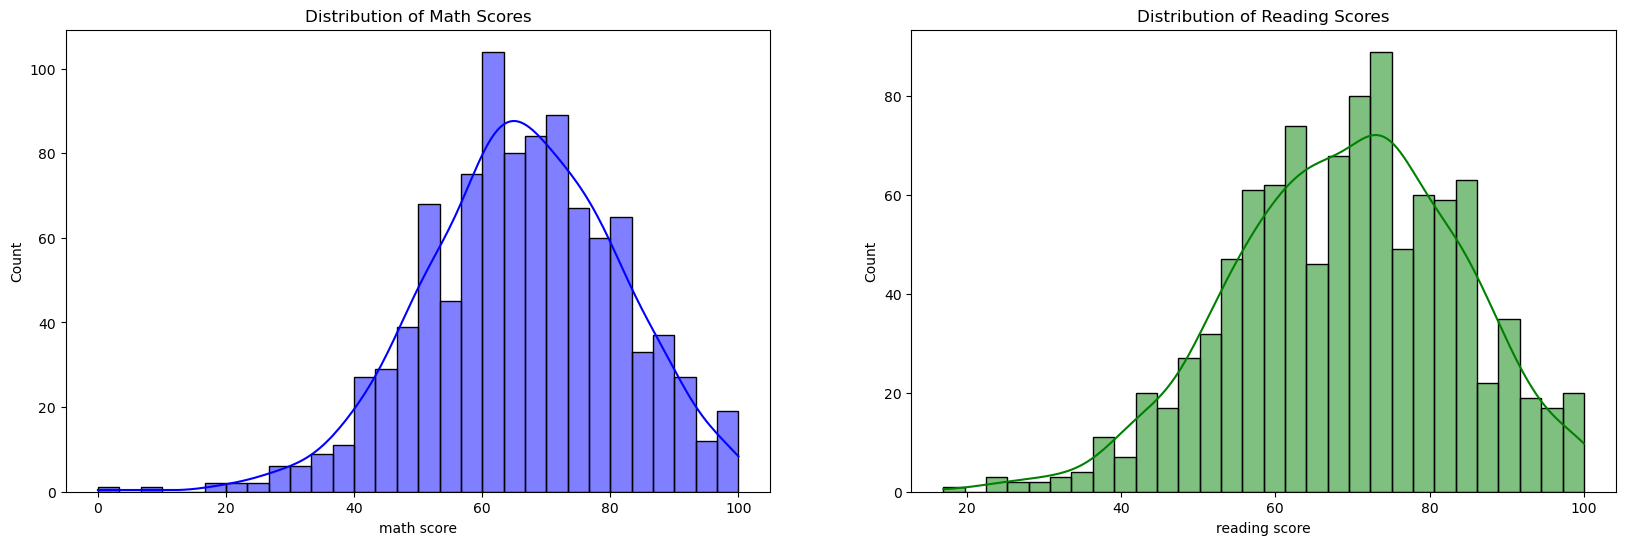

In [60]:
fig, axes = plt.subplots(1, 2, figsize=(20, 6))
plt.subplot(121)
sns.histplot(df['math score'], kde=True, color='blue', bins=30)
plt.title('Distribution of Math Scores')
plt.subplot(122)
sns.histplot(df['reading score'], kde=True, color='green', bins=30)
plt.title('Distribution of Reading Scores')
plt.show()

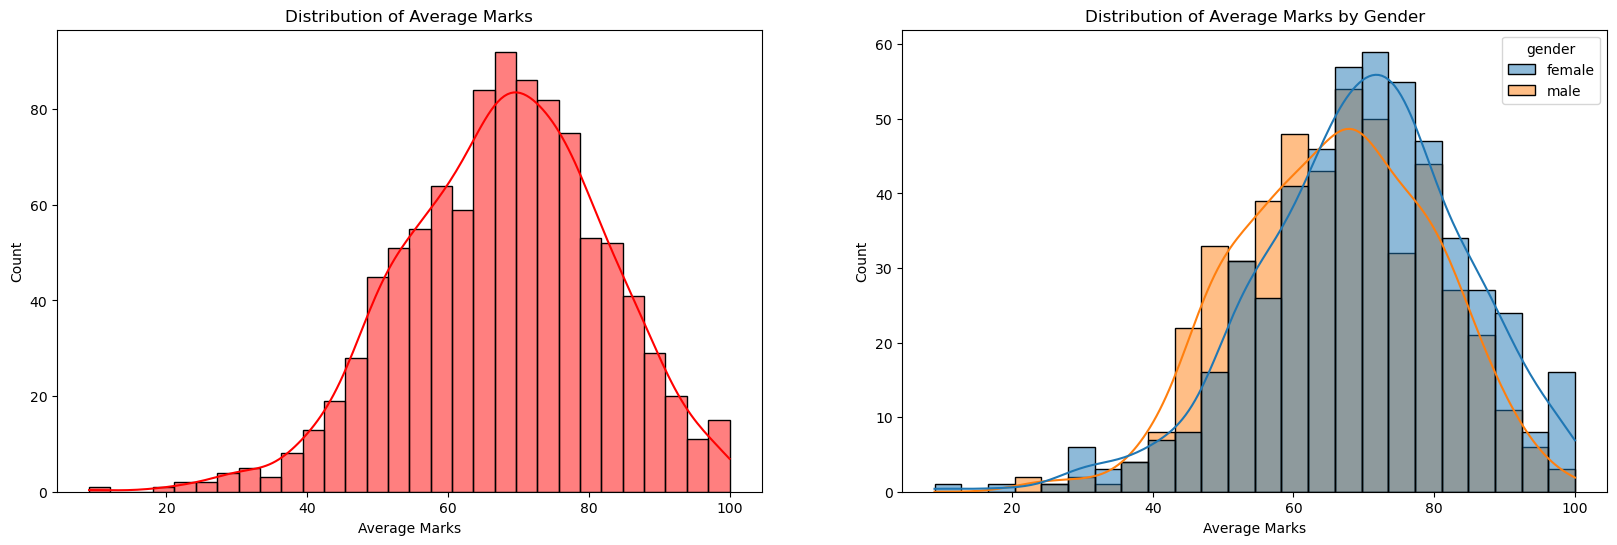

In [61]:
fig, axes = plt.subplots(1, 2, figsize=(20, 6))
plt.subplot(121)
sns.histplot(data=df, x="Average Marks", kde=True, color='red', bins=30)
plt.title('Distribution of Average Marks')
plt.subplot(122)
sns.histplot(data=df, x="Average Marks", kde=True, hue="gender")
plt.title('Distribution of Average Marks by Gender')
plt.show()


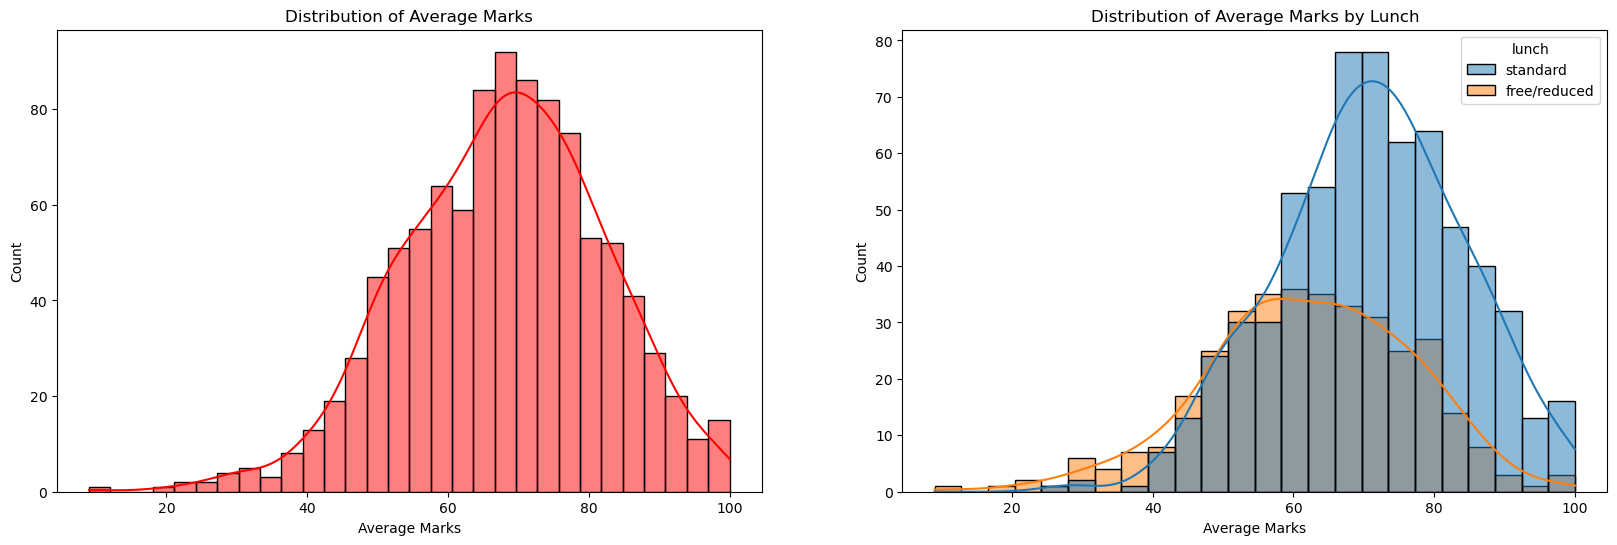

In [62]:
fig, axes = plt.subplots(1, 2, figsize=(20, 6))
plt.subplot(121)
sns.histplot(data=df, x="Average Marks", kde=True, color='red', bins=30)
plt.title('Distribution of Average Marks')
plt.subplot(122)
sns.histplot(data=df, x="Average Marks", kde=True, hue="lunch")
plt.title('Distribution of Average Marks by Lunch')
plt.show()

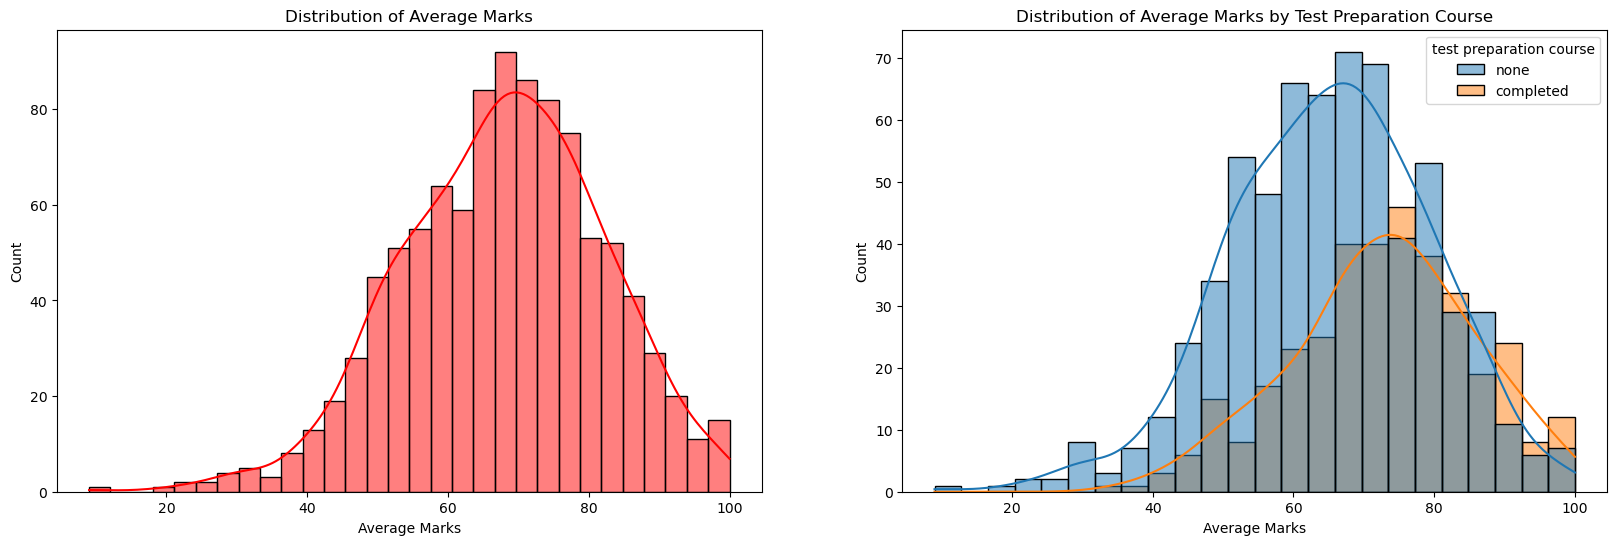

In [63]:
fig, axes = plt.subplots(1, 2, figsize=(20, 6))
plt.subplot(121)
sns.histplot(data=df, x="Average Marks", kde=True, color='red', bins=30)
plt.title('Distribution of Average Marks')
plt.subplot(122)
sns.histplot(data=df, x="Average Marks", kde=True, hue="test preparation course")
plt.title('Distribution of Average Marks by Test Preparation Course')
plt.show()

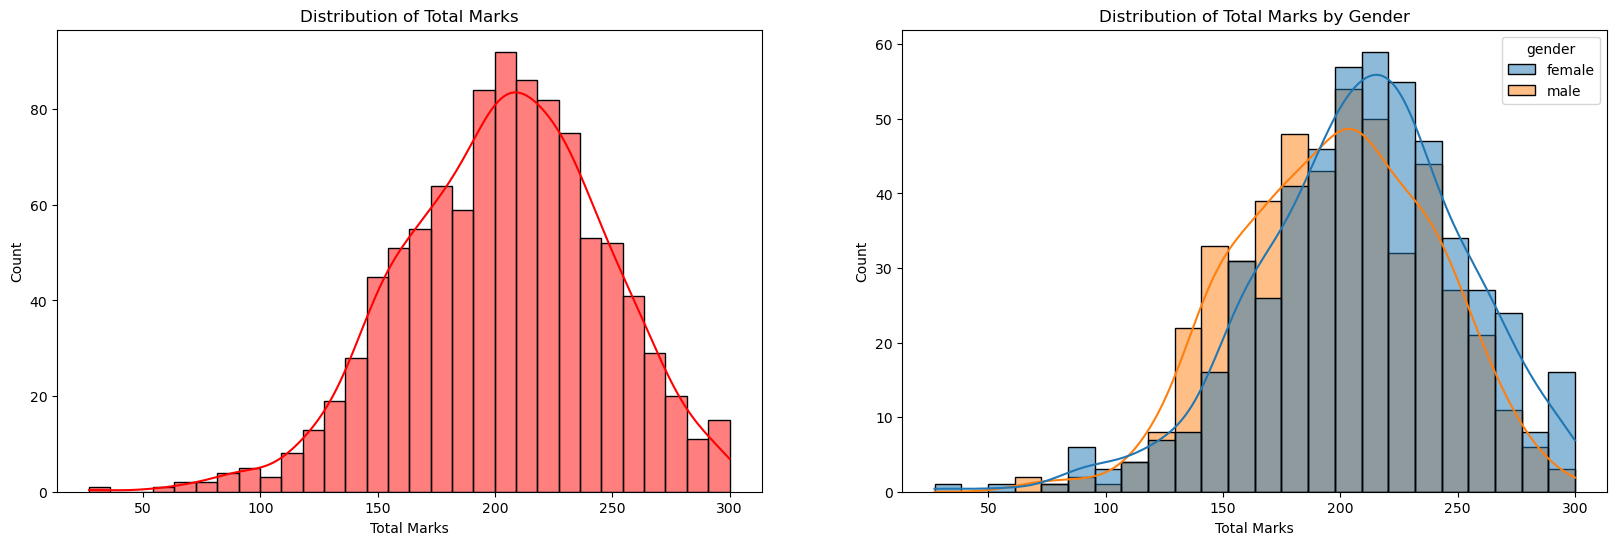

In [64]:
fig, axes = plt.subplots(1, 2, figsize=(20, 6))
plt.subplot(121)
sns.histplot(data=df, x="Total Marks", kde=True, color='red', bins=30)
plt.title('Distribution of Total Marks')
plt.subplot(122)
sns.histplot(data=df, x="Total Marks", kde=True, hue="gender")
plt.title('Distribution of Total Marks by Gender')
plt.show()

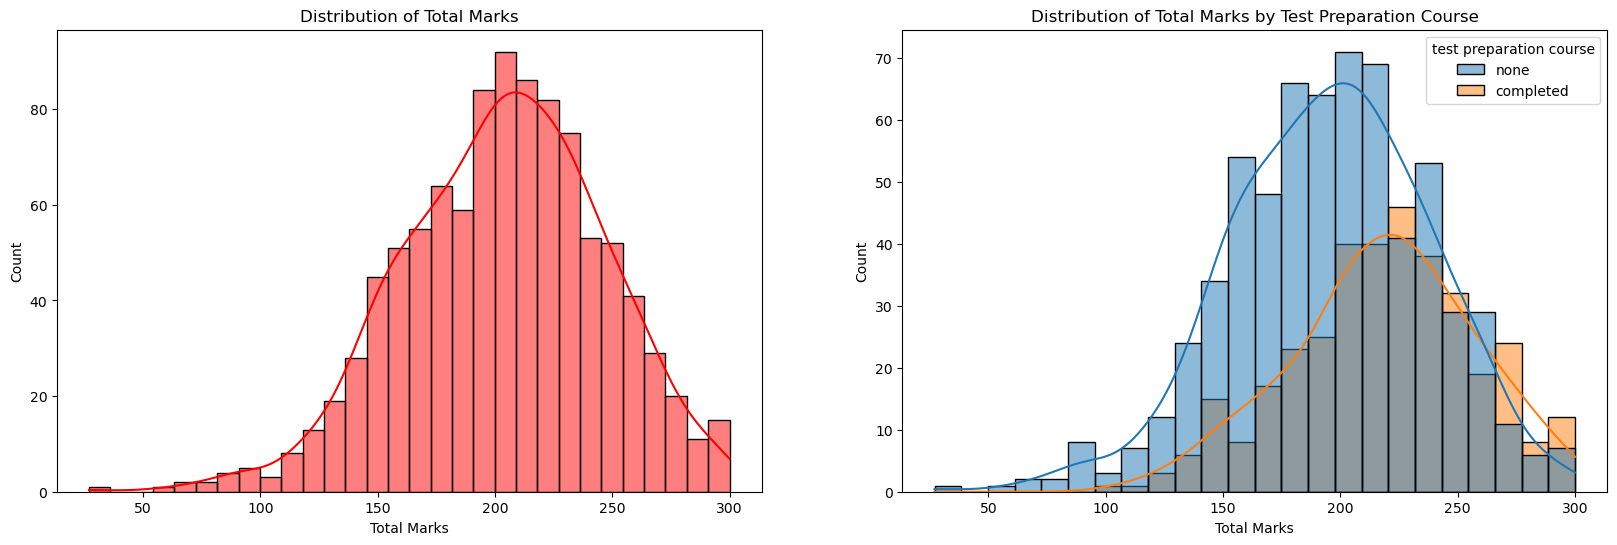

In [65]:
fig, axes = plt.subplots(1, 2, figsize=(20, 6))
plt.subplot(121)
sns.histplot(data=df, x="Total Marks", kde=True, color='red', bins=30)
plt.title('Distribution of Total Marks')
plt.subplot(122)
sns.histplot(data=df, x="Total Marks", kde=True, hue="test preparation course")
plt.title('Distribution of Total Marks by Test Preparation Course')
plt.show()

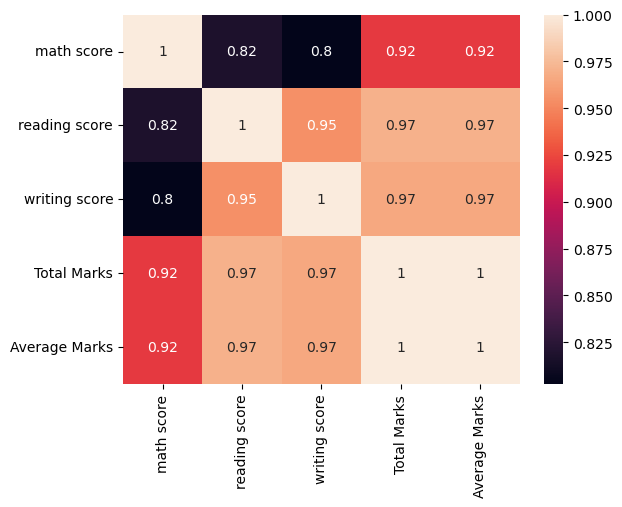

In [66]:
sns.heatmap(df.corr(numeric_only=True),annot=True)
plt.show()

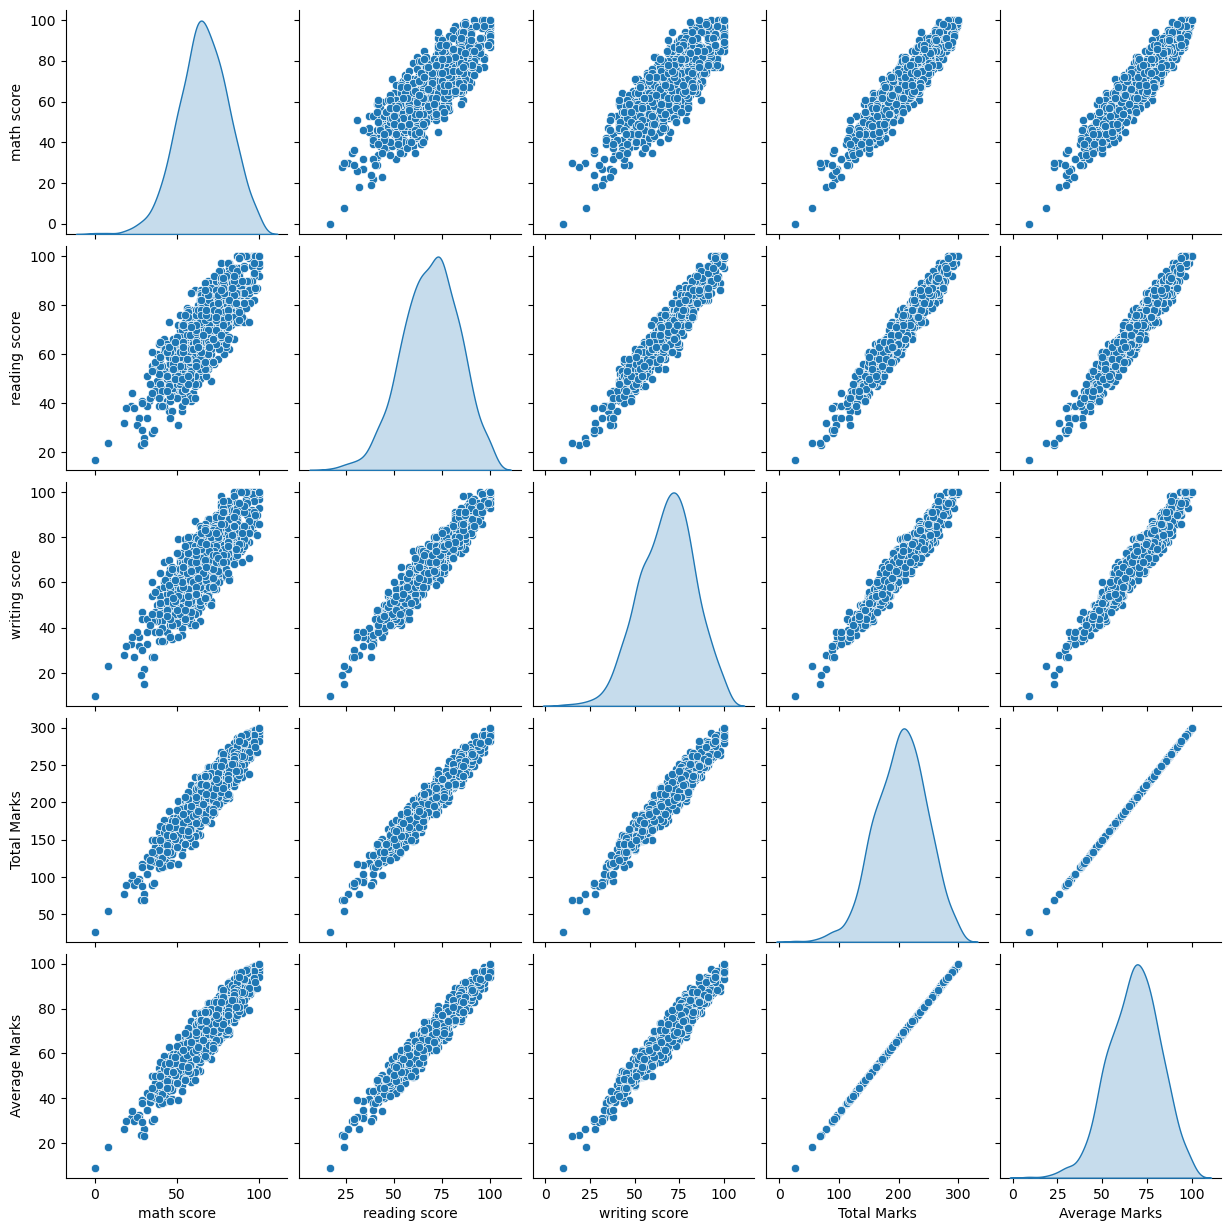

In [67]:
sns.pairplot(df,diag_kind='kde')
plt.show()

# <p style="padding:10px;background-color:#87CEEB ;margin:10;color:#000000;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 10px 10px ;overflow:hidden;font-weight:50">Categorical Features vs Target Feature Price Boxplot</p>

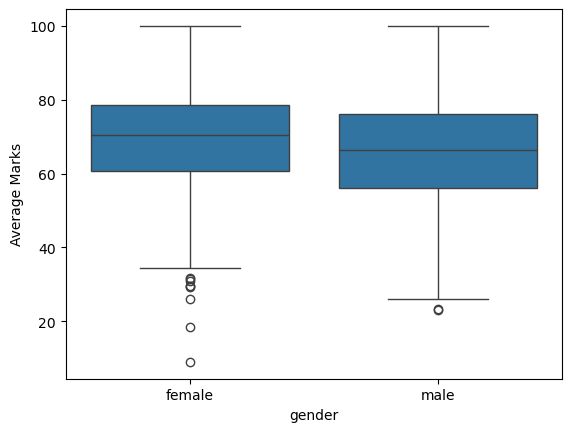

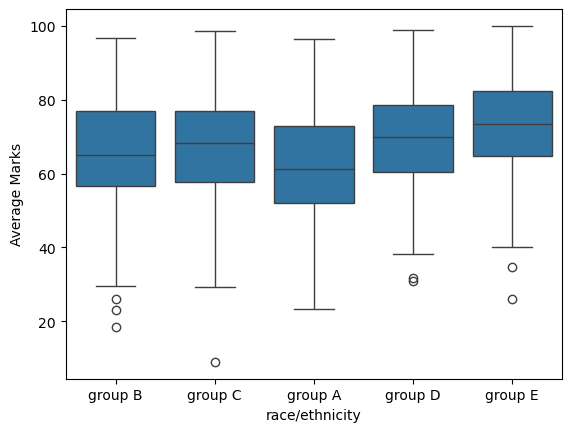

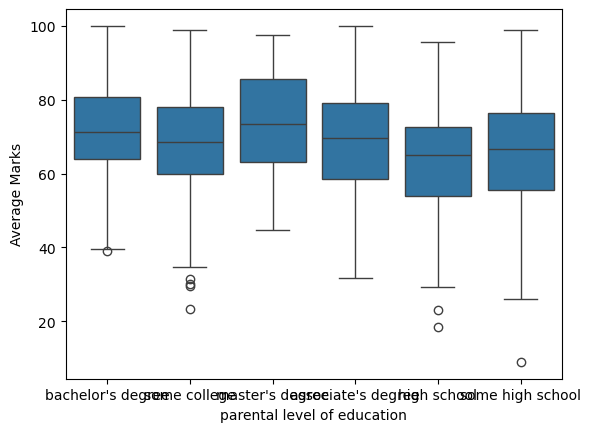

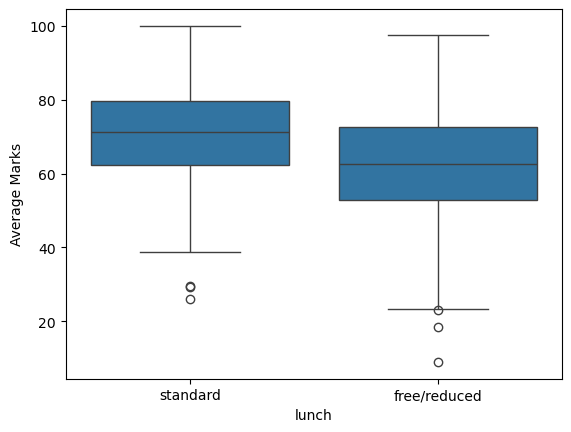

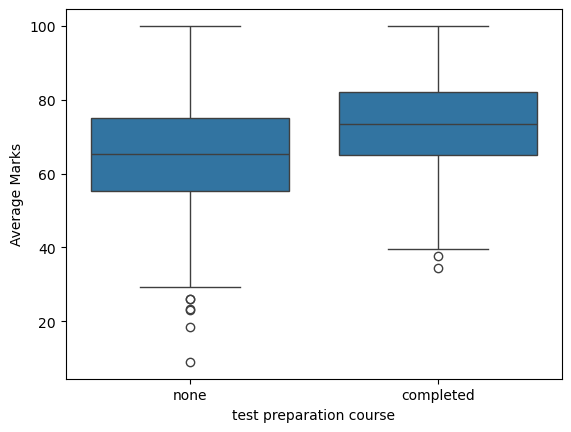

In [68]:
for i in categotirical_features:
    sns.boxplot(data=df, x=i , y='Average Marks')
    plt.show()

# <p style="padding:10px;background-color:#87CEEB ;margin:10;color:#000000;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 10px 10px ;overflow:hidden;font-weight:50">Calculating Mutual Information scores for regression</p>

In [72]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total Marks,Average Marks
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [76]:
print("Categories in 'gender' column:", end=" ")
print(df['gender'].unique())

print("Categories in 'race/ethnicity' column:", end=" ")
print(df['race/ethnicity'].unique())

print("Categories in 'parental level of education' column:", end=" ")
print(df['parental level of education'].unique())

print("Categories in 'lunch' column:", end=" ")
print(df['lunch'].unique())

print("Categories in 'test preparation course' column:", end=" ")
print(df['test preparation course'].unique())

Categories in 'gender' column: ['female' 'male']
Categories in 'race/ethnicity' column: ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental level of education' column: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' column: ['standard' 'free/reduced']
Categories in 'test preparation course' column: ['none' 'completed']


In [84]:
gender_mapping = {'male':0, 'female':1}
race_ethenicity_mapping = {'group A':1, 'group B':2, 'group C':3, 'group D':4, 'group E':5}
parental_level_of_education_mapping = {"associate's degree":1, "bachelor's degree":2, "master's degree":3, "some college":4, "high school":5, "some high school":6}
lunch_mapping = {'standard':1, 'free/reduced':0}
test_preparation_course_mapping = {'completed':1, 'none':0}


In [85]:
df['gender'] = df['gender'].replace(gender_mapping)
df['race/ethnicity'] = df['race/ethnicity'].replace(race_ethenicity_mapping)
df['parental level of education'] = df['parental level of education'].replace(parental_level_of_education_mapping)
df['lunch'] = df['lunch'].replace(lunch_mapping)
df['test preparation course'] = df['test preparation course'].replace(test_preparation_course_mapping)

In [86]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total Marks,Average Marks
0,1,2,2,1,0,72,72,74,218,72.666667
1,1,3,4,1,1,69,90,88,247,82.333333
2,1,2,3,1,0,90,95,93,278,92.666667
3,0,1,1,0,0,47,57,44,148,49.333333
4,0,3,4,1,0,76,78,75,229,76.333333


In [87]:
X = df.drop(labels=['Average Marks'],axis=1)
Y = df[['Average Marks']]

In [88]:
from sklearn.feature_selection import mutual_info_regression
mi_scores = mutual_info_regression(X,Y.values.flatten(),random_state=42)
mi_scores = pd.Series(mi_scores, name="MI Scores",index=X.columns)
mi_scores = mi_scores.sort_values(ascending=False)

In [89]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")
    plt.show()

Total Marks                    4.968537
reading score                  1.451338
writing score                  1.362231
math score                     0.968478
parental level of education    0.064185
test preparation course        0.054286
lunch                          0.042330
gender                         0.015529
race/ethnicity                 0.005472
Name: MI Scores, dtype: float64


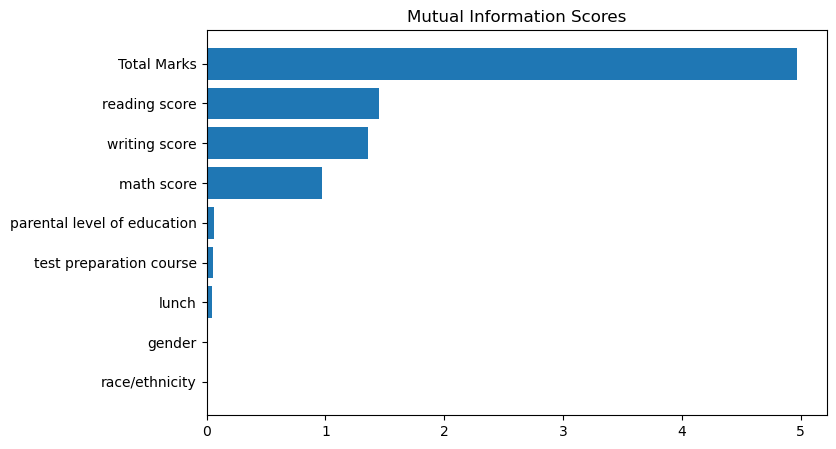

In [90]:
print(mi_scores)
plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)